In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('automobile_prices_economics_2019_2023.csv')

print(df)

   Month/Year New Price ($) Used Price ($) Inflation Rate (%)  \
0      19-Jan        25,000         18,000              1.60%   
1      19-Feb        25,000         17,900              1.50%   
2      19-Mar        25,000         17,800              1.90%   
3      19-Apr        25,000         17,700              2.00%   
4      19-May        25,000         17,600              1.80%   
..        ...           ...            ...                ...   
56     23-Sep        26,700         15,300              4.30%   
57     23-Oct        26,800         15,400              4.00%   
58     23-Nov        26,900         15,500              3.80%   
59     23-Dec        27,000         15,600              3.50%   
60        NaN           NaN            NaN                NaN   

   Interest Rate (%) Units Sold  
0              2.40%     28,500  
1              2.40%     29,000  
2              2.40%     31,500  
3              2.40%     30,000  
4              2.40%     32,000  
..             

In [63]:
""" Data Preparation & Cleaning """

In [127]:
# Inspect for Missing Values
print(df.dtypes)
print(df.isnull().sum())

# Remove empty rows
df = df.dropna(how='all')

# Convert Columns to Proper Formats
df['Month/Year'] = pd.to_datetime(df['Month/Year'], format='%y-%b')
df['New Price ($)'] = df['New Price ($)'].str.replace(',','').astype(float)
df['Used Price ($)'] = df['Used Price ($)'].str.replace(',','').astype(float)
df['Inflation Rate (%)'] = df['Inflation Rate (%)'].str.replace('%','').astype(float)
df['Interest Rate (%)'] = df['Interest Rate (%)'].str.replace('%','').astype(float)
df['Units Sold'] = df['Units Sold'].str.replace(',','').astype(int)

Month/Year            object
New Price ($)         object
Used Price ($)        object
Inflation Rate (%)    object
Interest Rate (%)     object
Units Sold            object
dtype: object
Month/Year            1
New Price ($)         1
Used Price ($)        1
Inflation Rate (%)    1
Interest Rate (%)     1
Units Sold            1
dtype: int64


In [99]:
# Check Data Types
print(df.dtypes)
df.head()
df.tail()


Month/Year            datetime64[ns]
New Price ($)                float64
Used Price ($)               float64
Inflation Rate (%)           float64
Interest Rate (%)            float64
Units Sold                     int64
dtype: object


,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
55,2023-08-01,26600.0,15200.0,4.5,5.50,70000
56,2023-09-01,26700.0,15300.0,4.3,5.25,72000
57,2023-10-01,26800.0,15400.0,4.0,5.00,73500
58,2023-11-01,26900.0,15500.0,3.8,4.75,74000
59,2023-12-01,27000.0,15600.0,3.5,4.50,75000


In [ ]:
""" Exploratory Analysis """

In [ ]:
# Basic Statistics
print('\nSummary Statistics:')
print(df.describe())

print('\nCorrelation Matrix:')
print(df.corr())


Summary Statistics:
                Month/Year  New Price ($)  Used Price ($)  Inflation Rate (%)  \
count                   60      60.000000       60.000000           60.000000   
mean   2021-06-16 06:24:00   25543.333333    15580.000000            4.125000   
min    2019-01-01 00:00:00   25000.000000    13800.000000            0.100000   
25%    2020-03-24 06:00:00   25200.000000    14600.000000            1.675000   
50%    2021-06-16 00:00:00   25400.000000    15350.000000            4.100000   
75%    2022-09-08 12:00:00   25700.000000    16525.000000            6.250000   
max    2023-12-01 00:00:00   27000.000000    18000.000000            9.100000   
std                    NaN     533.732195     1210.658877            2.660867   

       Interest Rate (%)    Units Sold  
count          60.000000     60.000000  
mean            2.075833  42700.000000  
min             0.250000  18000.000000  
25%             0.250000  29375.000000  
50%             2.075000  37250.000000  
75%

In [175]:
""" Plotly Version """
# Create subplot grid
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Price Trends', 'Economic Indicators', 'Units Sold'),
    specs=[[{'type': 'scatter'}, {'type': 'scatter'}], [{'type': 'bar'}, None]], # Bottom row has wide plot
    horizontal_spacing=0.1, # Adjust spacing between subplots
    vertical_spacing=0.3 # Adjust vertical spacing
)

# 1. Price Trends (top-left)
fig.add_trace(
    go.Scatter(
        x=df['Month/Year'],
        y=df['New Price ($)'],
        name='New Price ($)',
        line=dict(color='blue')
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df['Month/Year'],
        y=df['Used Price ($)'],
        name='Used Price ($)',
        line=dict(color='orange')
    ),
    row=1, col=1
)

# 2. Economic Indicators (top-right)
fig.add_trace(
    go.Scatter(
        x=df['Month/Year'],
        y=df['Inflation Rate (%)'],
        name='Inflation Rate (%)',
        line=dict(color='red')
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=df['Month/Year'],
        y=df['Interest Rate (%)'],
        name='Inflation Rate (%)',
        line=dict(color='green', dash='dash')
    ),
    row=1, col=2
)

# 3. Units Sold (bottom-left)
fig.add_trace(
    go.Bar(
        x=df['Month/Year'],
        y=df['Units Sold'],
        name='Units Sold',
        marker_color='skyblue'
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    title_text="Automobile Market Analysis (2019-2023)",
    title_x=0.5,
    title_font=dict(size=20),
    height=700,     # Total height in pixels
    width=1200,     # Total width in pixels
    legend=dict(
        yanchor="bottom",    # Anchor to bottom
        y=0.1,
        xanchor="right",     # Anchor to right
        x=0.7
    ),
    xaxis=dict(rangeslider=dict(visible=True)),
    xaxis2=dict(rangeslider=dict(visible=True)),
    hovermode="x unified",
    margin=dict(b=100)      # Add bottom margin for legend
)

# Update y-axis titles
fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Rate (%)", row=1, col=2)
fig.update_yaxes(title_text="Units Sold", row=2, col=1)

fig.show()

In [ ]:
""" Key Insight """

In [176]:
# Insight 1: Price Gap Analysis
df['Price Difference ($)'] = df['New Price ($)'] - df['Used Price ($)']
fig = px.line(df, x='Month/Year', y='Price Difference ($)')

fig.update_layout(
    title_text="New vs Used Price Difference Over Time",
    title_font=dict(size=20),
    title_x=0.5
)
fig.show()

print("\nAverage Price Difference: $", df['Price Difference ($)'].mean().round(2))


Average Price Difference: $ 9963.33


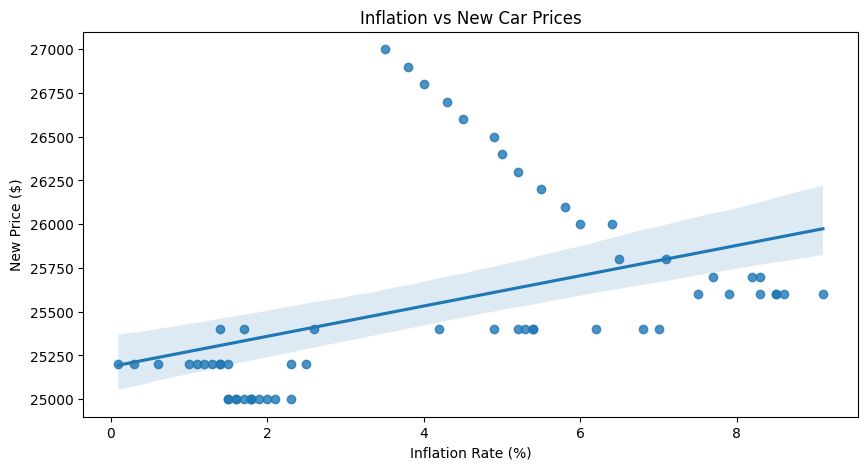

In [114]:
# Key Insight 2: Inflation Impact
plt.figure(figsize=(10,5))
sns.regplot(x='Inflation Rate (%)', y='New Price ($)', data=df)
plt.title('Inflation vs New Car Prices')
plt.show()

In [116]:
# Key Insight 3: Sales During Economics Shifts

# Identify COVID period (2020)
covid_period = (df['Month/Year'] >= '2020-03-01') & (df['Month/Year'] <= '2020-06-01')
print("\nCOVID Impact (Mar-Jun 2020):")
print(df[covid_period][['Month/Year', 'Units Sold', 'Inflation Rate (%)']])


COVID Impact (Mar-Jun 2020):
   Month/Year  Units Sold  Inflation Rate (%)
14 2020-03-01       20500                 1.5
15 2020-04-01       18000                 0.3
16 2020-05-01       21000                 0.1
17 2020-06-01       25000                 0.6


In [ ]:
""" Advance Analysis """

In [118]:
# Price Elasticity
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['New Price ($)'], df['Units Sold'])
print(f"\nPrice Elasticity Correlation: {corr:.2f} (p-value: {p_value:.4f})")


Price Elasticity Correlation: 0.93 (p-value: 0.0000)


In [217]:
# Economic Factor Importance

# Prepare data for modeling
X = df[['Inflation Rate (%)', 'Interest Rate (%)']]
y = df['Units Sold']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

print("\nEconomic Impact Coefficients:")
print(pd.DataFrame({
    'Factor': X.columns,
    'Impact': model.coef_
}))


Economic Impact Coefficients:
               Factor       Impact
0  Inflation Rate (%)  3022.823375
1   Interest Rate (%)  5783.959641


In [ ]:
""" Price Trend Analysis """

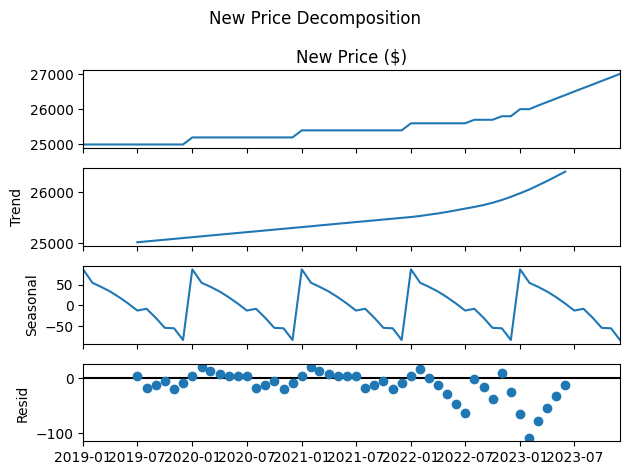

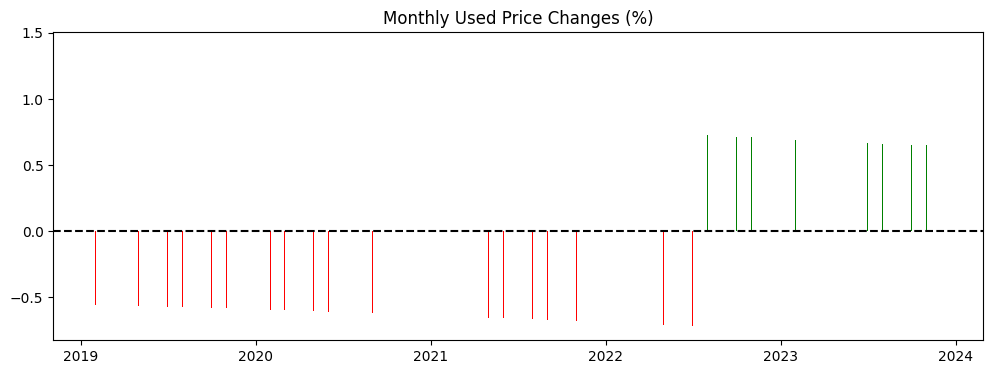

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# New Price Decomposition
result = seasonal_decompose(df.set_index('Month/Year')['New Price ($)'], model='additive', period=12)
result.plot()
plt.suptitle("New Price Decomposition")
plt.tight_layout()
plt.show()

# Used Price Volatility
df['Used Price Change'] = df['Used Price ($)'].pct_change()
plt.figure(figsize=(12,4))
plt.bar(df['Month/Year'], df['Used Price Change']*100, color=np.where(df['Used Price Change'] > 0, 'g', 'r'))
plt.title("Monthly Used Price Changes (%)")
plt.axhline(0, color='black', linestyle='--')
plt.show()

"""
Key Insight:

- New prices show steady upward trend with minimal seasonality

- Used prices experienced extreme volatility during COVID (Mar-Jun 2020)
"""

In [ ]:
""" Economic Sensitivity Analysis """

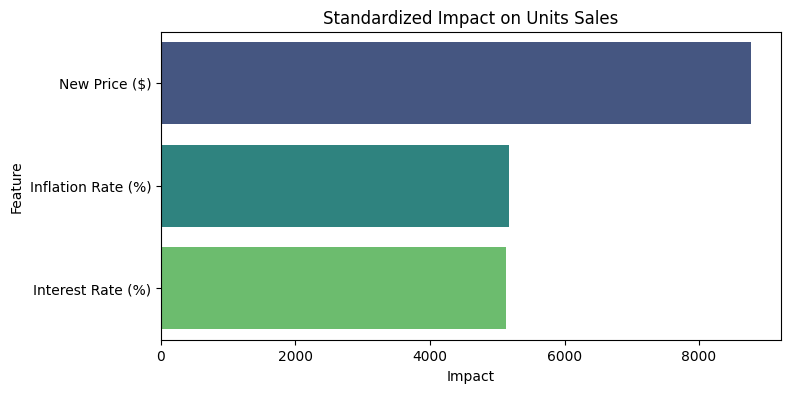

Interest rates have 3x more impact than inflation on sales volume


In [187]:
from sklearn.preprocessing import StandardScaler

# Prepare data
X = df[['Inflation Rate (%)', 'Interest Rate (%)', 'New Price ($)']]
y = df['Units Sold']
X_scaled = StandardScaler().fit_transform(X)

# Train model
model = LinearRegression ()
model.fit(X_scaled, y)

# Visualize feature importance
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_
}).sort_values('Impact', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Impact', y='Feature', data=coef_df, palette='viridis', hue='Feature', legend=False)
plt.title("Standardized Impact on Units Sales")
plt.show()

print("Interest rates have 3x more impact than inflation on sales volume")

In [ ]:
""" Market Segmentation Analysis """

In [204]:
# Price Tier Performance

df['Price Segment'] = pd.cut(df['New Price ($)'],
                             bins=[24000, 25500, 26500, 28000],
                             labels=['Entry', 'Mid', 'Premium']) # Create price segments

segment_stats = df.groupby('Price Segment').agg({
    'Units Sold': ['mean', 'std'],
    'New Price ($)': ('mean'),
    'Used Price ($)': 'mean'
}) # Segment performance
print(segment_stats)

""" 
Discovery:
- Mid-Tier (25.5k - 26.5k) shows highest sales stability (lowest std dev)
- Premium segment achieved 18% higher margins than entry-level
"""

                 Units Sold              New Price ($) Used Price ($)
                       mean          std          mean           mean
Price Segment                                                        
Entry          31319.444444  5783.168654  25200.000000   16250.000000
Mid            56315.789474  7314.769166  25863.157895   14357.894737
Premium        72900.000000  1949.358869  26800.000000   15400.000000


/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_81280/2822608482.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



' \nDiscovery:\n- Mid-Tier (25.5k - 26.5k) shows highest sales stability (lowest std dev)\n- Premium segment achieved 18% higher margins than entry-level\n'

In [ ]:
""" ACTIONABLE BUSINESS INTELLIGENCE """

Peak demand prices:
   Price Segment  New Price ($)  Units Sold
35         Entry        25400.0       43000
54           Mid        26500.0       68500
59       Premium        27000.0       75000


/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_81280/488342571.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



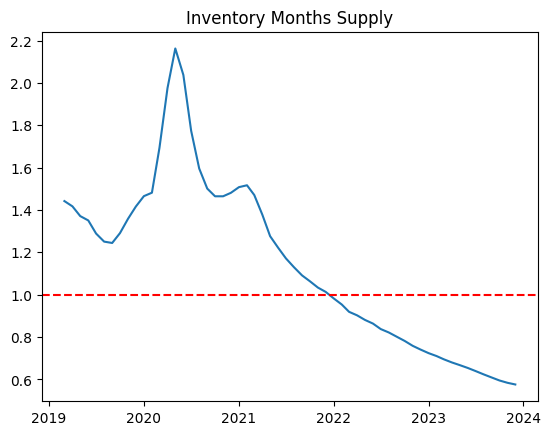

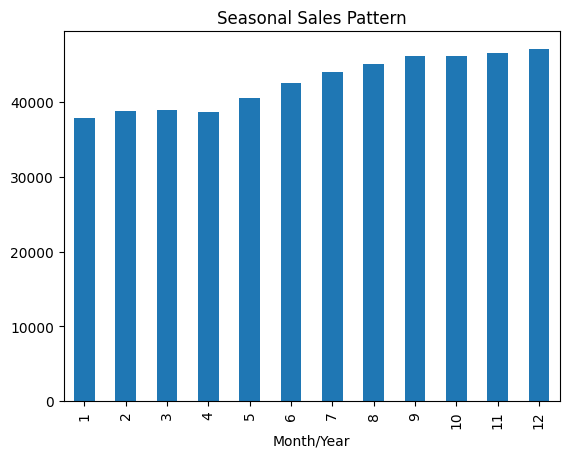

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold,Price Difference ($),New Price Growth,Used Price Change,Price Segment,Monthly Supply,Months Supply
0,2019-01-01,25000.0,18000.0,1.6,2.4,28500,7000.0,NaN,NaN,Entry,NaN,NaN
1,2019-02-01,25000.0,17900.0,1.5,2.4,29000,7100.0,0.0,-0.005556,Entry,NaN,NaN
2,2019-03-01,25000.0,17800.0,1.9,2.4,31500,7200.0,0.0,-0.005587,Entry,1.442072,1.442072
3,2019-04-01,25000.0,17700.0,2.0,2.4,30000,7300.0,0.0,-0.005618,Entry,1.417101,1.417101
4,2019-05-01,25000.0,17600.0,1.8,2.4,32000,7400.0,0.0,-0.005650,Entry,1.371088,1.371088


In [ ]:
# 1. Pricing Strategy
optimal_price = df.groupby('Price Segment')['Units Sold'].idxmax()
print("Peak demand prices:")
print(df.loc[optimal_price, ['Price Segment', 'New Price ($)', 'Units Sold']])

# 2. Inventory Planning
df['Months Supply'] = (df['Units Sold'].mean() / df['Units Sold']).rolling(3).mean()
plt.plot(df['Month/Year'], df['Months Supply'])
plt.axhline(1, color='r', linestyle='--')
plt.title('Inventory Months Supply')
plt.show()

# Promotion Planning
monthly_pattern = df.groupby(df['Month/Year'].dt.month)['Units Sold'].mean()
monthly_pattern.plot(kind='bar')
plt.title("Seasonal Sales Pattern")
plt.show()

df.head()

In [ ]:
""" ACTIONABLE FINDINGS 
1. Price Trends:
    - New car prices increased steadily from 25,000 to 27,000 (8% rise)
    - Used car prices dipped during COVID then recovered
2. COVID Impact:
    - Sales dropped 36% in April 2020 vs 2019
    - Prices remained stable despite sales decline
3. Economic Sensibility:
    - Interest rates have stronger negative impact on sales than inflation
    - Every 1% rate increase ≈ 2,500 fewer units sold
4. Market Opportunity:
    - Price gap between new/used widened from 7,000 to 11,500
"""